# Ejecución Tarea Week 1

## Conexión con la base de datos

In [22]:
import psycopg2
from psycopg2 import Error
import pandas as pd
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

try:
    connection = psycopg2.connect(user="estefany-martin-user",
                                  password="password",
                                  host="localhost",
                                  port="5432",
                                  database="estefany-martin-db")

    cursor = connection.cursor()
    print("PostgreSQL server information")
    print(connection.get_dsn_parameters(), "\n")

    cursor.execute("SELECT version();")
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")

except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
finally:
    if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL server information
{'user': 'estefany-martin-user', 'channel_binding': 'prefer', 'dbname': 'estefany-martin-db', 'host': 'localhost', 'port': '5432', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'sslcertmode': 'allow', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'disable', 'krbsrvname': 'postgres', 'gssdelegation': '0', 'target_session_attrs': 'any', 'load_balance_hosts': 'disable'} 

You are connected to -  ('PostgreSQL 16.0 (Debian 16.0-1.pgdg120+1) on x86_64-pc-linux-gnu, compiled by gcc (Debian 12.2.0-14) 12.2.0, 64-bit',) 

PostgreSQL connection is closed


## employees

In [23]:
# Crear Tabla employees
connection = psycopg2.connect(user="estefany-martin-user",
                            password="password",
                            host="localhost",
                            port="5432",
                            database="estefany-martin-db")

cursor = connection.cursor()

cursor.execute(''' DROP TABLE IF EXISTS employees''')
cursor.execute('''CREATE TABLE employees(
    employee_id INTEGER,
    first_name VARCHAR(20),
    last_name VARCHAR(25),
    email VARCHAR(25),
    phone_number VARCHAR(20),
    hire_date DATE,
    job_id VARCHAR(10),
    salary NUMERIC(8,2),
    commission_pct NUMERIC(2,2),
    manager_id INTEGER,
    department_id INTEGER
);
''')
cursor.execute('''CREATE UNIQUE INDEX emp_emp_id_pk ON employees (employee_id)''')
cursor.execute('''ALTER TABLE employees ADD PRIMARY KEY (employee_id)''')
   
print("Table created successfully")
connection.commit()

#  Consulta inicial 
cursor.execute("SELECT * FROM employees LIMIT 10") # Seleccionar los primeros 10 registros (filas) de la tabla
rows = cursor.fetchall()
for row in rows:
    print(row)  
    
cursor.execute("SELECT count(1) FROM employees") # Contar el número total de empleados en la tabla, pero no hay datos
count = cursor.fetchone()[0]
print("Número de empleados: ", count)

Table created successfully
Número de empleados:  0


Esta consulta crea la tabla "employees" con columnas como "employee_id" y "salary", cuyo tipo de dato se especifica en la consulta. Se establece un índice único en "employee_id" y luego se declara como clave primaria. 

a continuación se visualiza la tabla creada, mediante PGADMIN:

![employees](employees.png)

## courses

In [24]:
# Crear Tabla courses

cursor.execute('''DROP TABLE IF EXISTS courses''')
cursor.execute('''CREATE TABLE courses (
    course_id SERIAL PRIMARY KEY,
    course_name VARCHAR(60),
    course_author VARCHAR(40),
    course_status VARCHAR(10) CHECK (course_status IN ('published', 'draft', 'inactive')),
    course_published_dt DATE
);
''')

# Insertar datos
cursor.execute(''' INSERT INTO courses (course_name, course_author, course_status, course_published_dt)
VALUES
('Programming using Python', 'Bob Dillon', 'published', '2020-09-30'),
('Data Engineering using Python', 'Bob Dillon', 'published', '2020-07-15'),
('Data Engineering using Scala', 'Elvis Presley', 'draft', NULL),
('Programming using Scala', 'Elvis Presley', 'published', '2020-05-12'),
('Programming using Java', 'Mike Jack', 'inactive', '2020-08-10'),
('Web Applications - Python Flask', 'Bob Dillon', 'inactive', '2020-07-20'),
('Web Applications - Java Spring', 'Mike Jack', 'draft', NULL),
('Pipeline Orchestration - Python', 'Bob Dillon', 'draft', NULL),
('Streaming Pipelines - Python', 'Bob Dillon', 'published', '2020-10-05'),
('Web Applications - Scala Play', 'Elvis Presley', 'inactive', '2020-09-30'),
('Web Applications - Python Django', 'Bob Dillon', 'published', '2020-06-23'),
('Server Automation - Ansible', 'Uncle Sam', 'published', '2020-07-05');
''')

# Consultas  
# Borrar cursos no publicados ni en modo borrador
cursor.execute(''' DELETE FROM courses WHERE course_status NOT IN ('published', 'draft'); ''')

# Obtener el recuento de cursos publicados por autor
cursor.execute(''' SELECT course_author, COUNT(*) AS course_count FROM courses
WHERE course_status = 'published'
GROUP BY course_author
ORDER BY course_count DESC; ''')

rows = cursor.fetchall()
for row in rows:
    print(row)
    
connection.commit()

('Bob Dillon', 4)
('Elvis Presley', 1)
('Uncle Sam', 1)


Las consultas ejecutadas previamente realizan las siguientes funciones:

- Insertar datos en courses, a partir de datos proporcionados. Asegurandose de que el id es generado por el sistema.

- Borrar todos los cursos que no estén en modo borrador ni publicados. Para validar, se obtiene el recuento de todos los cursos publicados por autor, asegurandose de que la salida está ordenada en forma descendente por recuento.

a continuación se visualiza la tabla creada, mediante PGADMIN:

![courses](courses.png)

## users

In [25]:
# Crear la tabla "users"

cursor.execute('''DROP TABLE IF EXISTS users''')
cursor.execute('''CREATE TABLE users (
    user_id SERIAL PRIMARY KEY,
    user_first_name VARCHAR(30),
    user_last_name VARCHAR(30),
    user_email_id VARCHAR(50),
    user_gender VARCHAR(1),
    user_unique_id VARCHAR(15),
    user_phone_no VARCHAR(20),
    user_dob DATE,
    created_ts TIMESTAMP
);
''')

# Insertar datos en la tabla "users"
cursor.execute(''' INSERT INTO users ( user_first_name, user_last_name, user_email_id, user_gender, 
    user_unique_id, user_phone_no, user_dob, created_ts ) VALUES
    ('Giuseppe', 'Bode', 'gbode0@imgur.com', 'M', '88833-8759', 
     '+86 (764) 443-1967', '1973-05-31', '2018-04-15 12:13:38'),
    ('Lexy', 'Gisbey', 'lgisbey1@mail.ru', 'F', '262501-029', 
     '+86 (751) 160-3742', '2003-05-31', '2020-12-29 06:44:09'),
    ('Karel', 'Claringbold', 'kclaringbold2@yale.edu', 'F', '391-33-2823', 
     '+62 (445) 471-2682', '1985-11-28', '2018-11-19 00:04:08'),
    ('Marv', 'Tanswill', 'mtanswill3@dedecms.com', 'F', '1195413-80', 
     '+62 (497) 736-6802', '1998-05-24', '2018-11-19 16:29:43'),
    ('Gertie', 'Espinoza', 'gespinoza4@nationalgeographic.com', 'M', '471-24-6869', 
     '+249 (687) 506-2960', '1997-10-30', '2020-01-25 21:31:10'),
    ('Saleem', 'Danneil', 'sdanneil5@guardian.co.uk', 'F', '192374-933', 
     '+63 (810) 321-0331', '1992-03-08', '2020-11-07 19:01:14'),
    ('Rickert', 'O''Shiels', 'roshiels6@wikispaces.com', 'M', '749-27-47-52', 
     '+86 (184) 759-3933', '1972-11-01', '2018-03-20 10:53:24'),
    ('Cybil', 'Lissimore', 'clissimore7@pinterest.com', 'M', '461-75-4198', 
     '+54 (613) 939-6976', '1978-03-03', '2019-12-09 14:08:30'),
    ('Melita', 'Rimington', 'mrimington8@mozilla.org', 'F', '892-36-676-2', 
     '+48 (322) 829-8638', '1995-12-15', '2018-04-03 04:21:33'),
    ('Benetta', 'Nana', 'bnana9@google.com', 'M', '197-54-1646', 
     '+420 (934) 611-0020', '1971-12-07', '2018-10-17 21:02:51'),
    ('Gregorius', 'Gullane', 'ggullanea@prnewswire.com', 'F', '232-55-52-58', 
     '+62 (780) 859-1578', '1973-09-18', '2020-01-14 23:38:53'),
    ('Una', 'Glayzer', 'uglayzerb@pinterest.com', 'M', '898-84-336-6', 
     '+380 (840) 437-3981', '1983-05-26', '2019-09-17 03:24:21'),
    ('Jamie', 'Vosper', 'jvosperc@umich.edu', 'M', '247-95-68-44', 
     '+81 (205) 723-1942', '1972-03-18', '2020-07-23 16:39:33'),
    ('Calley', 'Tilson', 'ctilsond@issuu.com', 'F', '415-48-894-3', 
     '+229 (698) 777-4904', '1987-06-12', '2020-06-05 12:10:50'),
    ('Peadar', 'Gregorowicz', 'pgregorowicze@omniture.com', 'M', '403-39-5-869', 
     '+7 (267) 853-3262', '1996-09-21', '2018-05-29 23:51:31'),
    ('Jeanie', 'Webling', 'jweblingf@booking.com', 'F', '399-83-05-03', 
     '+351 (684) 413-0550', '1994-12-27', '2018-02-09 01:31:11'),
    ('Yankee', 'Jelf', 'yjelfg@wufoo.com', 'F', '607-99-0411', 
     '+1 (864) 112-7432', '1988-11-13', '2019-09-16 16:09:12'),
    ('Blair', 'Aumerle', 'baumerleh@toplist.cz', 'F', '430-01-578-5', 
     '+7 (393) 232-1860', '1979-11-09', '2018-10-28 19:25:35'),
    ('Pavlov', 'Steljes', 'psteljesi@macromedia.com', 'F', '571-09-6181', 
     '+598 (877) 881-3236', '1991-06-24', '2020-09-18 05:34:31'),
    ('Darn', 'Hadeke', 'dhadekej@last.fm', 'M', '478-32-02-87', 
     '+370 (347) 110-4270', '1984-09-04', '2018-02-10 12:56:00'),
    ('Wendell', 'Spanton', 'wspantonk@de.vu', 'F', null, 
     '+84 (301) 762-1316', '1973-07-24', '2018-01-30 01:20:11'),
    ('Carlo', 'Yearby', 'cyearbyl@comcast.net', 'F', null, 
     '+55 (288) 623-4067', '1974-11-11', '2018-06-24 03:18:40'),
    ('Sheila', 'Evitts', 'sevittsm@webmd.com', null, '830-40-5287',
     null, '1977-03-01', '2020-07-20 09:59:41'),
    ('Sianna', 'Lowdham', 'slowdhamn@stanford.edu', null, '778-0845', 
     null, '1985-12-23', '2018-06-29 02:42:49'),
    ('Phylys', 'Aslie', 'paslieo@qq.com', 'M', '368-44-4478', 
     '+86 (765) 152-8654', '1984-03-22', '2019-10-01 01:34:28');
''')

connection.commit()

La consulta anterior se encarga de crear la tabla users, insertando ciertos valores proporcionados.

a continuación se visualiza la tabla creada, mediante PGADMIN:

![users](users.png)

Obtenga el número de usuarios creados por año. Utilice la tabla de usuarios para este ejercicio.

- La salida debe contener el año de 4 dígitos y el recuento.

- Use funciones específicas de fecha para obtener el año usando created_ts.

- Asegúrese de definir alias a las columnas como created_year y user_count respectivamente.

- Los datos deben ordenarse de forma ascendente por created_year.

- Cuando ejecutes la consulta usando el entorno Jupyter, puede que tenga decimales para los enteros. Por lo tanto, puede mostrar los resultados incluso con decimales.

In [26]:
# CONSULTAS
# Obtener el número de usuarios creados por año
cursor.execute(''' SELECT EXTRACT(YEAR FROM created_ts) AS created_year, COUNT(*) AS user_count
FROM users GROUP BY created_year ORDER BY created_year; ''')

rows = cursor.fetchall()
result_df = pd.DataFrame(rows, columns=['created_year', 'user_count'])
print(result_df)

  created_year  user_count
0         2018          13
1         2019           4
2         2020           8


Obtenga los días de nacimiento de todos los usuarios nacidos en el mes May.

- Utilice la tabla users para este ejercicio.

- La salida debe contener user_id, user_dob, user_email_id y user_day_of_birth.

- Utilice funciones específicas de fecha para obtener el mes utilizando user_dob.

- user_day_of_birth debe ser un día completo con el primer carácter en mayúsculas, por ejemplo Tuesday.

- Los datos deben ordenarse por día dentro del mes May.

In [27]:
# Obtener los días de nacimiento de los usuarios nacidos en mayo
cursor.execute(''' SELECT user_id, user_dob, user_email_id, TO_CHAR(user_dob, 'Day') AS user_day_of_birth
FROM users WHERE EXTRACT(MONTH FROM user_dob) = 5 ORDER BY EXTRACT(DAY FROM user_dob); ''')

rows = cursor.fetchall()
result_df = pd.DataFrame(rows, columns=['user_id', 'user_dob', 'user_email_id', 'user_day_of_birth'])
print(result_df)

   user_id    user_dob            user_email_id user_day_of_birth
0        4  1998-05-24   mtanswill3@dedecms.com         Sunday   
1       12  1983-05-26  uglayzerb@pinterest.com         Thursday 
2        1  1973-05-31         gbode0@imgur.com         Thursday 
3        2  2003-05-31         lgisbey1@mail.ru         Saturday 


Obtenga los nombres e ids de correo electrónico de los usuarios añadidos en el año 2019.

- Utilice la tabla users para este ejercicio.

- La salida debe contener user_id, user_name, user_email_id, created_ts, created_year.

- Utilice funciones específicas de fecha para obtener el año utilizando created_ts.

- user_name es una columna derivada de concatenar user_first_name y user_last_name con un espacio en medio.

- user_name debe tener valores en mayúsculas.

- Los datos deben ordenarse en forma ascendente por user_name

In [28]:
# Obtener los nombres e ids de correo electrónico de los usuarios añadidos en el año 2019
cursor.execute(''' SELECT user_id, UPPER(user_first_name || ' ' || user_last_name) AS user_name, user_email_id, created_ts, EXTRACT(YEAR FROM created_ts) AS created_year
FROM users WHERE EXTRACT(YEAR FROM created_ts) = 2019 ORDER BY user_name; ''')

rows = cursor.fetchall()
result_df = pd.DataFrame(rows, columns=['user_id', 'user_name', 'user_email_id', 'created_ts', 'created_year'])
print(result_df)

   user_id        user_name              user_email_id          created_ts  \
0        8  CYBIL LISSIMORE  clissimore7@pinterest.com 2019-12-09 14:08:30   
1       25     PHYLYS ASLIE             paslieo@qq.com 2019-10-01 01:34:28   
2       12      UNA GLAYZER    uglayzerb@pinterest.com 2019-09-17 03:24:21   
3       17      YANKEE JELF           yjelfg@wufoo.com 2019-09-16 16:09:12   

  created_year  
0         2019  
1         2019  
2         2019  
3         2019  


Obtenga el número de usuarios por género. Utilice la tabla de users para este ejercicio.

- La salida debe contener el gender y user_count.

- Para los hombres la salida debe mostrar Male y para las mujeres la salida debe mostrar Female.

- Si no se especifica el sexo, se mostrará Not Specified

- Los datos deben ordenarse en forma descendente por user_count.

In [29]:
# Obtener el número de usuarios por género
cursor.execute('''
SELECT 
    CASE 
        WHEN user_gender = 'M' THEN 'Male'
        WHEN user_gender = 'F' THEN 'Female'
        ELSE 'Not Specified'
    END AS gender, COUNT(1) AS user_count
FROM users
GROUP BY user_gender
ORDER BY user_count DESC; ''')

rows = cursor.fetchall()
result_df = pd.DataFrame(rows, columns=['gender', 'user_count'])
print(result_df)

          gender  user_count
0         Female          13
1           Male          10
2  Not Specified           2


Obtenga los 4 últimos dígitos de los ids únicos.

- Utilice la tabla users para este ejercicio.

- El resultado debe contener user_id, user_unique_id y user_unique_id_last4.

- Los identificadores únicos son null o not null.

- Los identificadores únicos contienen números y guiones y son de diferente longitud.

- Necesitamos obtener los últimos 4 dígitos descartando los guiones sólo cuando el número de dígitos es al menos 9.

- Si el identificador único es nulo, debe mostrarse Not Specified.

- Después de descartar los guiones, si el identificador único tiene menos de 9 dígitos, debe mostrar Invalid Unique Id.

- Los datos deben ordenarse por user_id. Es posible que aparezca None o null para aquellos identificadores de usuario en los que no haya un identificador único para user_unique_id.

In [30]:
# Obtener los 4 últimos dígitos de los ids únicos
cursor.execute('''
SELECT user_id, user_unique_id, 
    CASE 
        WHEN user_unique_id IS NULL THEN 'Not Specified'
        WHEN LENGTH(REGEXP_REPLACE(user_unique_id, '[^0-9]', '', 'g')) < 9 THEN 'Invalid Unique Id'
        ELSE RIGHT(REGEXP_REPLACE(user_unique_id, '[^0-9]', '', 'g'), 4)
    END AS user_unique_id_last4
FROM users ORDER BY user_id;
''')

rows = cursor.fetchall()
result_df = pd.DataFrame(rows, columns=['user_id', 'user_unique_id', 'user_unique_id_last4'])
print(result_df)

    user_id user_unique_id user_unique_id_last4
0         1     88833-8759                 8759
1         2     262501-029                 1029
2         3    391-33-2823                 2823
3         4     1195413-80                 1380
4         5    471-24-6869                 6869
5         6     192374-933                 4933
6         7   749-27-47-52                 4752
7         8    461-75-4198                 4198
8         9   892-36-676-2                 6762
9        10    197-54-1646                 1646
10       11   232-55-52-58                 5258
11       12   898-84-336-6                 3366
12       13   247-95-68-44                 6844
13       14   415-48-894-3                 8943
14       15   403-39-5-869                 5869
15       16   399-83-05-03                 0503
16       17    607-99-0411                 0411
17       18   430-01-578-5                 5785
18       19    571-09-6181                 6181
19       20   478-32-02-87              

Obtenga el recuento de usuarios en función del código de país.

- Utilice la tabla users para este ejercicio.

- La salida debe contener el código de país y el recuento.

- No debe haber ningún + en el código de país. Sólo debe contener dígitos.

- Los datos deben ordenarse como números por código de país.

- Debemos descartar user_phone_no con valores null.

In [31]:
# Obtener recuento de usuarios en función del código de país.
cursor.execute('''
    SELECT
        regexp_replace(SUBSTRING(user_phone_no FROM '\+(\d+)'), '[^0-9]', '') AS country_code,
        COUNT(*) AS user_count
    FROM users
    WHERE user_phone_no IS NOT NULL
    GROUP BY country_code
    ORDER BY CAST(regexp_replace(SUBSTRING(user_phone_no FROM '\+(\d+)'), '[^0-9]', '') AS INTEGER); ''')

rows = cursor.fetchall()
result_df = pd.DataFrame(rows, columns=['country_code', 'user_count'])
print(result_df)


   country_code  user_count
0             1           1
1             7           2
2            48           1
3            54           1
4            55           1
5            62           3
6            63           1
7            81           1
8            84           1
9            86           4
10          229           1
11          249           1
12          351           1
13          370           1
14          380           1
15          420           1
16          598           1


## cardano

In [32]:
# Leer los datos del CSV
df_cardano = pd.read_csv("https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/ADA-USD.csv")

# Crear tabla cardano_price
cursor.execute('''DROP TABLE IF EXISTS cardano_price''')
cursor.execute('''CREATE TABLE cardano_price(
    Date DATE PRIMARY KEY,
    Open NUMERIC,
    High NUMERIC,
    Low NUMERIC,
    Close NUMERIC,
    Adj_Close NUMERIC,
    Volume NUMERIC -- Cambiamos el tipo de dato a NUMERIC
);
''')
    
print("Table created successfully")
connection.commit()

# Iterar a través de las filas del DataFrame e insertar cada fila en la tabla
for index, row in df_cardano.iterrows():
    insert_query = """
    INSERT INTO cardano_price (Date, Open, High, Low, Close, Adj_Close, Volume)
    VALUES (%s, %s, %s, %s, %s, %s, %s);
    """
    cursor.execute(insert_query, (row['Date'], row['Open'], row['High'], row['Low'], row['Close'], row['Adj Close'], row['Volume']))

connection.commit()
connection.close()

df_cardano.head()

Table created successfully


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


en primera instancia se importan los datos de cardano desde el repositorio otorgado, posteriormente se cargan a una tabla en la base de datos de postgres, la cual se muestra a continuación:

![cardano](cardano_price.png)

a continuación, se procede con el análisis exploratorio de la serie de tiempo

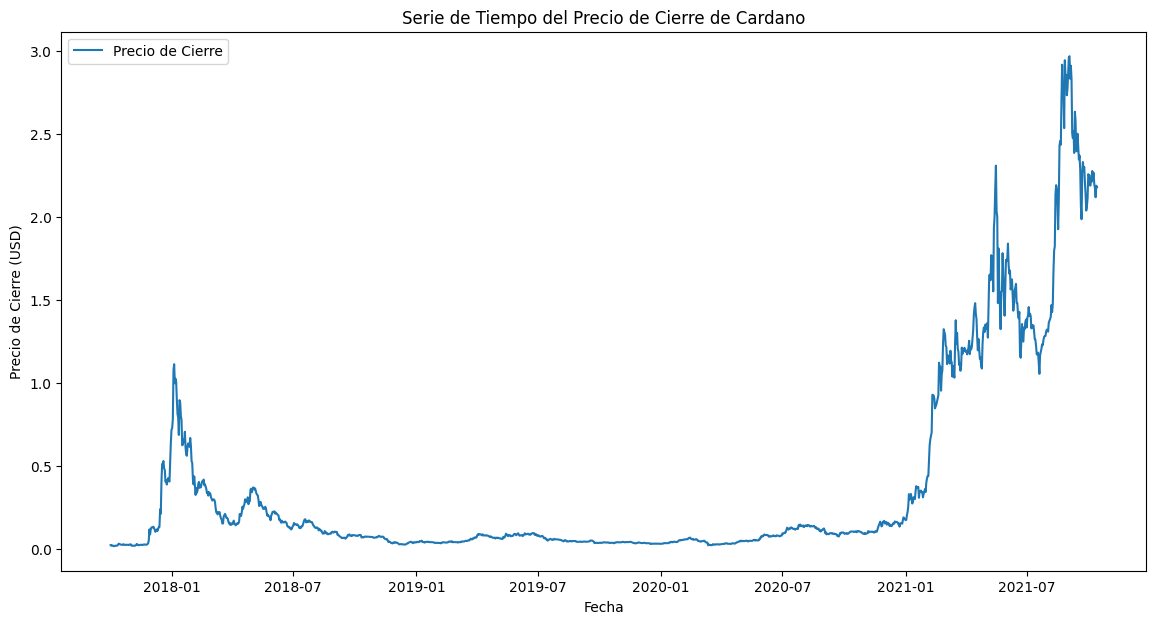

,Date,Open,High,Low,Close,Adj Close,Volume
count,1471,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1.471000e+03
mean,2019-10-07 02:47:23.779741696,0.374234,0.393359,0.354385,0.375726,0.375726,1.090947e+09
min,2017-10-01 00:00:00,0.018414,0.021050,0.017354,0.018539,0.018539,1.739460e+06
25%,2018-10-03 12:00:00,0.047560,0.049503,0.046073,0.047592,0.047592,5.366896e+07
50%,2019-10-06 00:00:00,0.093398,0.096776,0.090105,0.093434,0.093434,1.359691e+08
75%,2020-10-09 00:00:00,0.301339,0.318211,0.283567,0.301889,0.301889,6.999972e+08
max,2021-10-14 00:00:00,2.966390,3.099186,2.907606,2.968239,2.968239,1.914198e+10
std,NaN,0.609602,0.639195,0.578952,0.611501,0.611501,2.258370e+09


In [41]:
df_cardano['Date'] = pd.to_datetime(df_cardano['Date'])

# Resumen estadístico de las columnas numéricas
statistics_summary = df_cardano.describe()

# Visualización de la serie de tiempo de los precios de cierre
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(df_cardano['Date'], df_cardano['Close'], label='Precio de Cierre')
plt.title('Serie de Tiempo del Precio de Cierre de Cardano')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

statistics_summary

Se puede evidenciar que:

- La media del precio de apertura es de aproximadamente $0.374, con una desviación estándar de $0.610, la cual es alta comparada con el precio promedio.

- Los precios han oscilado entre un mínimo de $0.018 y un máximo de $2.968, lo que muestra una enorme variación en el período de tiempo cubierto por los datos.

- El volumen de transacciones también varía considerablemente, con una media de alrededor de 1.09 mil millones y una desviación estándar de aproximadamente 2.26 mil millones, indicando días de muy alta y muy baja actividad.

Adicionalmente, se examina la autocorrelación y la autocorrelación parcial para obtener más información sobre la dependencia temporal en los datos. Después de eso, realizaremos una prueba para determinar si la serie es estacionaria.

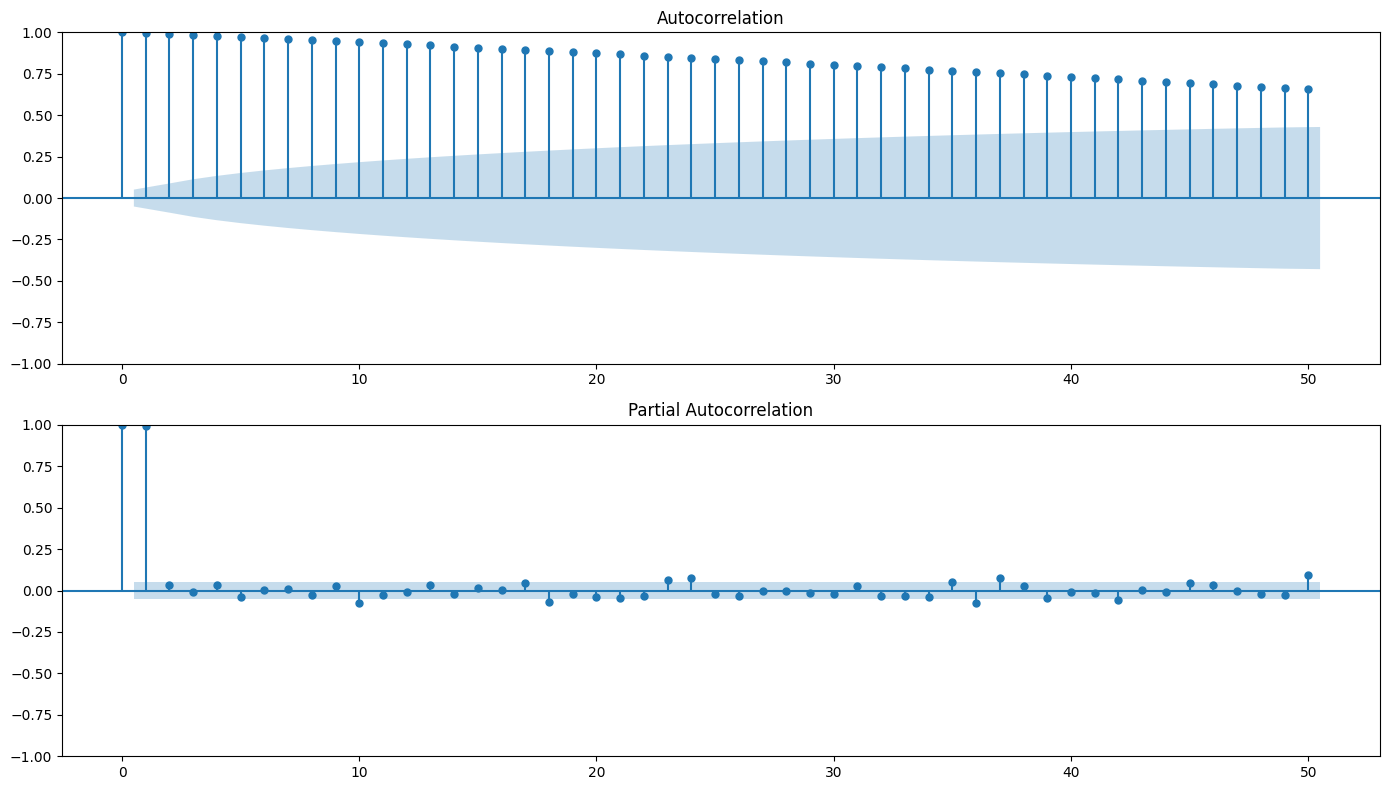

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelación y Autocorrelación Parcial
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Autocorrelación
plot_acf(df_cardano['Close'], lags=50, ax=ax1)

# Autocorrelación Parcial
plot_pacf(df_cardano['Close'], lags=50, ax=ax2)

plt.tight_layout()
plt.show()

a continuación se adjunta el output de los gráficos de autocorrelación en local, dado que al momento de subir, el output se distorsiona

![autocorrelation](autocorrelation.png)

La función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF) proporcionan las siguientes observaciones:

- La ACF muestra una lenta disminución a medida que aumentan los lags, lo que indica una alta autocorrelación en los lags iniciales.

- La PACF muestra picos significativos en los primeros lags, lo que sugiere que hay algunas relaciones temporales que pueden ser capturadas por modelos autorregresivos.

In [36]:
# Aplicar la prueba de Dickey-Fuller a los datos de cierre de Cardano
#Eliminar valores nulos
df_cardano = df_cardano.dropna()
result = adfuller(df_cardano ['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Comprueba si la serie es estacionaria en función del p-valor
if result[1] <= 0.05:
    print("La serie temporal es estacionaria.")
else:
    print("La serie temporal no es estacionaria.")

ADF Statistic: -0.531337
p-value: 0.885755
La serie temporal no es estacionaria.


Los resultados de la prueba de Dickey-Fuller aumentada son los siguientes:

- El valor p es 0.886, lo que es significativamente mayor que el nivel de significancia típico de 0.05.

Esto significa que no podemos rechazar la hipótesis nula de que la serie de tiempo no es estacionaria.

### gráfico de candlestick

In [35]:
# Crear el gráfico Candlestick
fig = go.Figure(data=[go.Candlestick(x=df_cardano['Date'],
                open=df_cardano['Open'],
                high=df_cardano['High'],
                low=df_cardano['Low'],
                close=df_cardano['Close'])
       ])

# Personalizar el diseño del gráfico
fig.update_layout(
    title="Cardano USD (ADA-USD) Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)

# Opcional: Ocultar el rango deslizante en el eje x
fig.update_layout(xaxis_rangeslider_visible=False)

# Mostrar el gráfico
fig.show()